In [54]:
import os
import sys
import matplotlib.pyplot as plt

# Definimos la Clase base "RamanSpectra" que debera contener información relacionada con la medicion
# TODO: Podemos añadir un mapeo de intensidades para caracterizar la superficie de medicion
# TODO: Añadir otros parametros de informacion para la muestra o espectro

class RamanSpectra(object):
    """
    RamanSpectra es un objeto que contiene los puntos de una medicion, es decir, 
    el objeto tiene un atributo correspondiente al eje x & otro para el eje y asi 
    como dos atributos mas para la información de la medición
    """

    def __init__(self, pathFile, upLevels = 0):
        self.readFromLocation(pathFile, upLevels)
        return;
    
    def __str__(self):
        return 'raman_s at +++ ' + self.r_id;

    def __repr__(self):
        return 'raman_s at ... ' + self.r_id;
    
    def readFromLocation(self, pathFile, upLevels):
        count = 0
        initialPath = os.getcwd().split('/')[1:]
        # TODO: Raise error when upLevels > treeDepth
        while count  < upLevels:
            initialPath.pop()
        docLoc = '/'+ '/'.join(initialPath)+pathFile
        with open(docLoc, 'r', encoding = 'unicode_escape') as tempfile:
                self.content = tempfile.read()
                self.info    = self.content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                self.values  = self.content.split('#Acquired')[1].split('\n')[1:-1]
                self.spx=[]
                self.spy=[]
                for string_values in self.values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    self.spx.append(x)
                    self.spy.append(y)
        return;
    
    
    def plot(self, darkMode=True):
        if darkMode:
            with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.facecolor':'1D0B3A'}):
                fig, ax = plt.subplots()
                ax.plot(self.spx, self.spy)
                ax.set_title(self.info)
        else:
            fig, ax = plt.subplots()
            ax.plot(self.spx, self.spy)
            ax.set_title(self.info)

In [55]:
s = RamanSpectra('/test.txt')

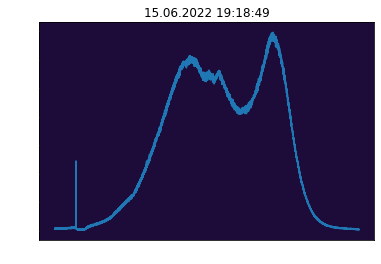

In [58]:
s.plot()